In [4]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset, random_split
import torchvision.datasets as datasets
import os
from scipy.interpolate import interp1d
%matplotlib inline

In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
plt.rcParams['axes.grid'] = True

In [7]:
roots = [2.2691853142129728, 2.104982167992544, 1.932307699120554, 1.749339162933206, 1.5536238493280832, 1.34187327905057, 1.109960313758399, 0.8541630993606272, 0.5762735442012712, 0.2885386111960936, 0.03198372863548067]
jds = [0.0, -0.1, -0.2, -0.3, -0.4, -0.5, -0.6, -0.7, -0.8, -0.9, -1.0]
get_crit_T = dict(zip(jds, roots))

In [8]:
Jd = -0.3

num_temps = 100
T_c = get_crit_T[Jd]
T = np.linspace(T_c - 0.3, T_c + 0.3, num_temps)

L = 10
with open(f'data_errors/{Jd}_{L}_{num_temps}_10_epochs.npy', 'rb') as f:
    errs_10 = np.load(f) 
L = 20
with open(f'data_errors/{Jd}_{L}_{num_temps}_10_epochs.npy', 'rb') as f:
    errs_20 = np.load(f) 
L = 30
with open(f'data_errors/{Jd}_{L}_{num_temps}_10_epochs.npy', 'rb') as f:
    errs_30 = np.load(f) 
L = 60
with open(f'data_errors/{Jd}_{L}_{num_temps}_10_epochs.npy', 'rb') as f:
    errs_60 = np.load(f) 
L = 80
with open(f'data_errors/{Jd}_{L}_{num_temps}_10_epochs.npy', 'rb') as f:
    errs_80 = np.load(f) 

In [9]:
def errs(errs):
    return np.array([sum(errs[i*512:(i+1)*512])/512 for i in range(num_temps)])

def stds_err(errs):
    return np.array([np.std(errs[i*512:(i+1)*512]) for i in range(num_temps)])

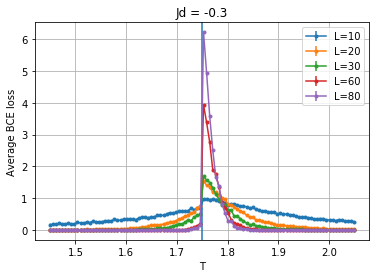

In [10]:
plt.errorbar(T, errs(errs_10), yerr=stds_err(errs_10)/1000, marker='.', label='L=10')
plt.errorbar(T, errs(errs_20), yerr=stds_err(errs_20)/1000, marker='.', label='L=20')
plt.errorbar(T, errs(errs_30), yerr=stds_err(errs_30)/1000, marker='.', label='L=30')
plt.errorbar(T, errs(errs_60), yerr=stds_err(errs_60)/1000, marker='.', label='L=60')
plt.errorbar(T, errs(errs_80), yerr=stds_err(errs_80)/1000, marker='.', label='L=80')

plt.title('Jd = -0.3')
plt.xlabel('T')
plt.ylabel('Average BCE loss')
plt.axvline(x=T_c)
plt.legend()
#plt.xlim(T_c-0.1, T_c+0.1)
plt.show()

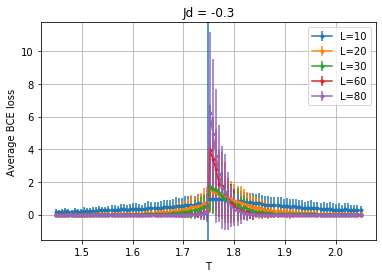

In [11]:
plt.errorbar(T, errs(errs_10), yerr=stds_err(errs_10), marker='.', label='L=10')
plt.errorbar(T, errs(errs_20), yerr=stds_err(errs_20), marker='.', label='L=20')
plt.errorbar(T, errs(errs_30), yerr=stds_err(errs_30), marker='.', label='L=30')
plt.errorbar(T, errs(errs_60), yerr=stds_err(errs_60), marker='.', label='L=60')
plt.errorbar(T, errs(errs_80), yerr=stds_err(errs_80), marker='.', label='L=80')

plt.title('Jd = -0.3')
plt.xlabel('T')
plt.ylabel('Average BCE loss')
plt.axvline(x=T_c)
plt.legend()
#plt.xlim(T_c-0.1, T_c+0.1)
plt.show()

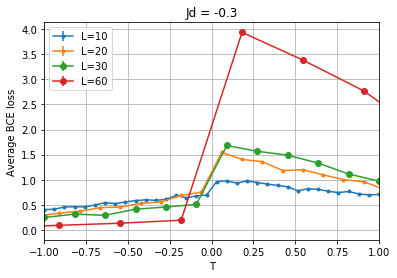

In [12]:
plt.errorbar((T-T_c)*10, errs(errs_10), yerr=stds_err(errs_10)/1000, marker='.', label='L=10')
plt.errorbar((T-T_c)*20, errs(errs_20), yerr=stds_err(errs_20)/1000, marker='.', label='L=20')
plt.errorbar((T-T_c)*30, errs(errs_30), yerr=stds_err(errs_30)/1000, marker='o', label='L=30')
plt.errorbar((T-T_c)*60, errs(errs_60), yerr=stds_err(errs_60)/1000, marker='o', label='L=60')


plt.title('Jd = -0.3')
plt.xlabel('T')
plt.ylabel('Average BCE loss')
plt.axvline(x=T_c)
#plt.xscale('log')
#plt.yscale('log')
plt.legend()
plt.xlim((-1, 1))
plt.show()

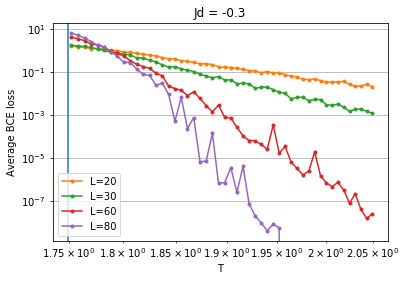

In [13]:
plt.plot(T[T>=T_c], errs(errs_20)[T>=T_c], marker='.', label='L=20', c='C1')
plt.plot(T[T>=T_c], errs(errs_30)[T>=T_c], marker='.', label='L=30', c='C2')
plt.plot(T[T>=T_c], errs(errs_60)[T>=T_c], marker='.', label='L=60', c='C3')
plt.plot(T[T>=T_c], errs(errs_80)[T>=T_c], marker='.', label='L=80', c='C4')


plt.title('Jd = -0.3')
plt.xlabel('T')
plt.ylabel('Average BCE loss')
plt.axvline(x=T_c)
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.savefig('images/03-temps-above.png')

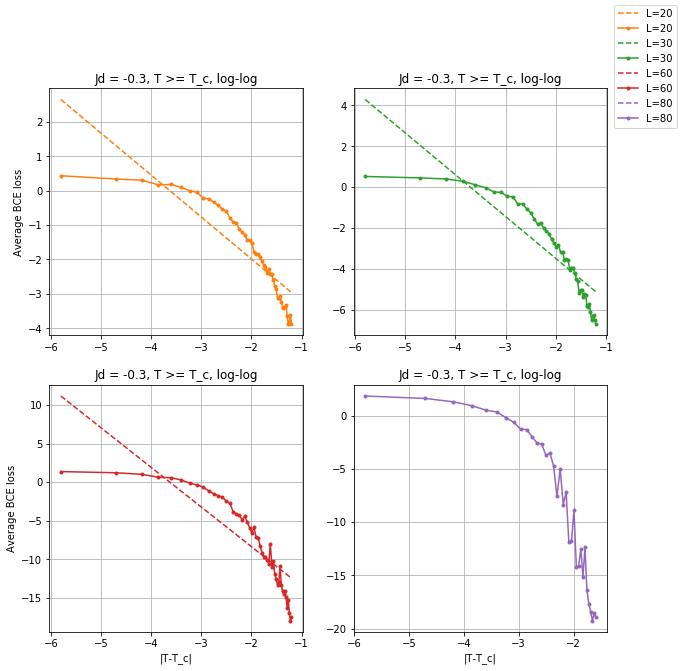

In [14]:
fig, ax = plt.subplots(2, 2, figsize=(10,10))

pf_20 = np.polyfit(np.log(np.abs(T-T_c)[50:]), np.log(errs(errs_20)[50:]), 1)
pf_30 = np.polyfit(np.log(np.abs(T-T_c)[50:]), np.log(errs(errs_30)[50:]), 1)
pf_60 = np.polyfit(np.log(np.abs(T-T_c)[50:]), np.log(errs(errs_60)[50:]), 1)
pf_80 = np.polyfit(np.log(np.abs(T-T_c)[50:]), np.log(errs(errs_80)[50:]), 1)

ax[0, 0].plot(np.log(np.abs(T-T_c)[50:]), np.poly1d(pf_20)(np.log(np.abs(T-T_c)))[50:], '--', label='L=20', c='C1')
ax[0, 1].plot(np.log(np.abs(T-T_c)[50:]), np.poly1d(pf_30)(np.log(np.abs(T-T_c)))[50:], '--', label='L=30', c='C2')
ax[1, 0].plot(np.log(np.abs(T-T_c)[50:]), np.poly1d(pf_60)(np.log(np.abs(T-T_c)))[50:], '--', label='L=60', c='C3')
ax[1, 1].plot(np.log(np.abs(T-T_c)[50:]), np.poly1d(pf_80)(np.log(np.abs(T-T_c)))[50:], '--', label='L=80', c='C4')

ax[0, 0].plot(np.log(np.abs(T-T_c)[50:]), np.log(errs(errs_20)[50:]), marker='.', label='L=20', c='C1')
ax[0, 1].plot(np.log(np.abs(T-T_c)[50:]), np.log(errs(errs_30)[50:]), marker='.', label='L=30', c='C2')
ax[1, 0].plot(np.log(np.abs(T-T_c)[50:]), np.log(errs(errs_60)[50:]), marker='.', label='L=60', c='C3')
ax[1, 1].plot(np.log(np.abs(T-T_c)[50:]), np.log(errs(errs_80)[50:]), marker='.', label='L=80', c='C4')

plt.setp(ax[-1, :], xlabel='|T-T_c|')
plt.setp(ax[:, 0], ylabel='Average BCE loss')
plt.setp(ax, title='Jd = -0.3, T >= T_c, log-log')
#plt.xscale('log')
#plt.yscale('log')
fig.legend()
fig.savefig('images/03-temps-above-log-log.png')

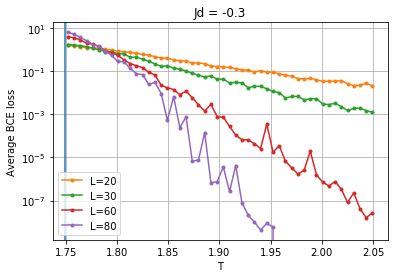

In [15]:
plt.plot(T[T>=T_c], errs(errs_20)[T>=T_c], marker='.', label='L=20', c='C1')
plt.plot(T[T>=T_c], errs(errs_30)[T>=T_c], marker='.', label='L=30', c='C2')
plt.plot(T[T>=T_c], errs(errs_60)[T>=T_c], marker='.', label='L=60', c='C3')
plt.plot(T[T>=T_c], errs(errs_80)[T>=T_c], marker='.', label='L=80', c='C4')


plt.title('Jd = -0.3')
plt.xlabel('T')
plt.ylabel('Average BCE loss')
plt.axvline(x=T_c)
#plt.xscale('log')
plt.yscale('log')
plt.legend()
#plt.savefig('images/03-temps-above-sim.png')

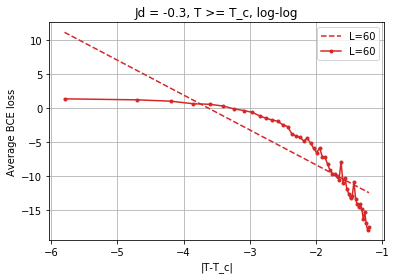

In [16]:
#pf_10 = np.polyfit(np.log(np.abs(T-T_c)[50:]), np.log(errs(errs_10)[50:]), 1)
#pf_20 = np.polyfit(np.log(np.abs(T-T_c)[50:]), np.log(errs(errs_20)[50:]), 1)
#pf_30 = np.polyfit(np.log(np.abs(T-T_c)[50:]), np.log(errs(errs_30)[50:]), 1)
pf_60 = np.polyfit(np.log(np.abs(T-T_c)[50:]), np.log(errs(errs_60)[50:]), 1)

#plt.plot(np.log(np.abs(T-T_c)[50:]), np.poly1d(pf_10)(np.log(np.abs(T-T_c)))[50:], '--', label='L=10', c='C0')
#plt.plot(np.log(np.abs(T-T_c)[50:]), np.poly1d(pf_20)(np.log(np.abs(T-T_c)))[50:], '--', label='L=20', c='C1')
#plt.plot(np.log(np.abs(T-T_c)[50:]), np.poly1d(pf_30)(np.log(np.abs(T-T_c)))[50:], '--', label='L=30', c='C2')
plt.plot(np.log(np.abs(T-T_c)[50:]), np.poly1d(pf_60)(np.log(np.abs(T-T_c)))[50:], '--', label='L=60', c='C3')

#plt.plot(np.log(np.abs(T-T_c)[50:]), np.log(errs(errs_10)[50:]), marker='.', label='L=10', c='C0')
#plt.plot(np.log(np.abs(T-T_c)[50:]), np.log(errs(errs_20)[50:]), marker='.', label='L=20', c='C1')
#plt.plot(np.log(np.abs(T-T_c)[50:]), np.log(errs(errs_30)[50:]), marker='.', label='L=30', c='C2')
plt.plot(np.log(np.abs(T-T_c)[50:]), np.log(errs(errs_60)[50:]), marker='.', label='L=60', c='C3')

#plt.setp(ax[-1, :], xlabel='|T-T_c|')
#plt.setp(ax[:, 0], ylabel='Average BCE loss')
#plt.setp(ax, title='Jd = 0.0, T >= T_c, log')
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('|T-T_c|')
plt.ylabel('Average BCE loss')
plt.title('Jd = -0.3, T >= T_c, log-log')
plt.legend()
plt.show()

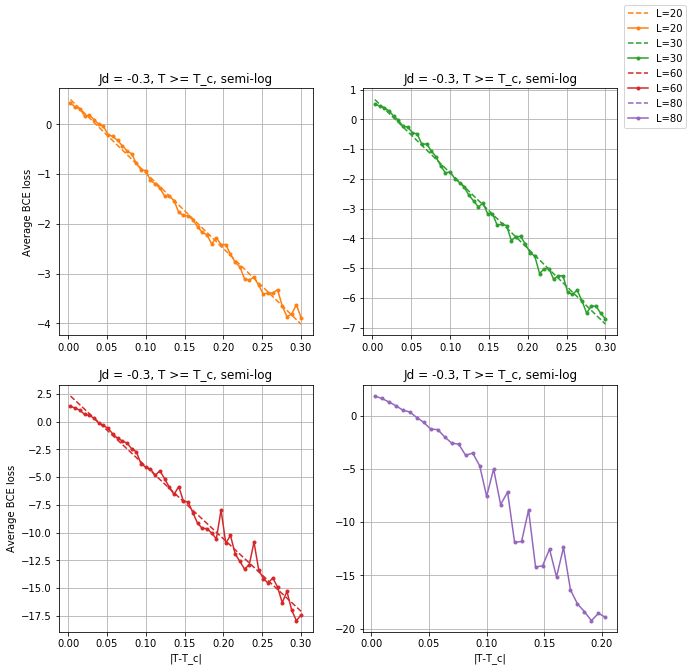

In [17]:
fig, ax = plt.subplots(2, 2, figsize=(10,10))

pf_20 = np.polyfit(np.abs(T-T_c)[50:], np.log(errs(errs_20)[50:]), 1)
pf_30 = np.polyfit(np.abs(T-T_c)[50:], np.log(errs(errs_30)[50:]), 1)
pf_60 = np.polyfit(np.abs(T-T_c)[50:], np.log(errs(errs_60)[50:]), 1)
pf_80 = np.polyfit(np.abs(T-T_c)[50:], np.log(errs(errs_80)[50:]), 1)

ax[0, 0].plot(np.abs(T-T_c)[50:], np.poly1d(pf_20)(np.abs(T-T_c))[50:], '--', label='L=20', c='C1')
ax[0, 1].plot(np.abs(T-T_c)[50:], np.poly1d(pf_30)(np.abs(T-T_c))[50:], '--', label='L=30', c='C2')
ax[1, 0].plot(np.abs(T-T_c)[50:], np.poly1d(pf_60)(np.abs(T-T_c))[50:], '--', label='L=60', c='C3')
ax[1, 1].plot(np.abs(T-T_c)[50:], np.poly1d(pf_80)(np.abs(T-T_c))[50:], '--', label='L=80', c='C4')

ax[0, 0].plot(np.abs(T-T_c)[50:], np.log(errs(errs_20)[50:]), marker='.', label='L=20', c='C1')
ax[0, 1].plot(np.abs(T-T_c)[50:], np.log(errs(errs_30)[50:]), marker='.', label='L=30', c='C2')
ax[1, 0].plot(np.abs(T-T_c)[50:], np.log(errs(errs_60)[50:]), marker='.', label='L=60', c='C3')
ax[1, 1].plot(np.abs(T-T_c)[50:], np.log(errs(errs_80)[50:]), marker='.', label='L=80', c='C4')

plt.setp(ax[-1, :], xlabel='|T-T_c|')
plt.setp(ax[:, 0], ylabel='Average BCE loss')
plt.setp(ax, title='Jd = -0.3, T >= T_c, semi-log')
#plt.xscale('log')
#plt.yscale('log')
fig.legend()
plt.savefig('images/03-temps-above-semi-log.png')

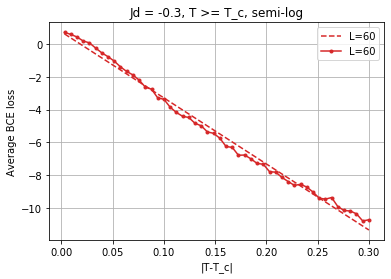

In [29]:
#pf_10 = np.polyfit(np.abs(T-T_c)[50:], np.log(errs(errs_10)[50:]), 1)
#pf_20 = np.polyfit(np.abs(T-T_c)[50:], np.log(errs(errs_20)[50:]), 1)
#pf_30 = np.polyfit(np.abs(T-T_c)[50:], np.log(errs(errs_30)[50:]), 1)
pf_60 = np.polyfit(np.abs(T-T_c)[50:], np.log(errs(errs_60)[50:]), 1)

#plt.plot(np.abs(T-T_c)[50:], np.poly1d(pf_10)(np.abs(T-T_c))[50:], '--', label='L=10', c='C0')
#plt.plot(np.abs(T-T_c)[50:], np.poly1d(pf_20)(np.abs(T-T_c))[50:], '--', label='L=20', c='C1')
#plt.plot(np.abs(T-T_c)[50:], np.poly1d(pf_30)(np.abs(T-T_c))[50:], '--', label='L=30', c='C2')
plt.plot(np.abs(T-T_c)[50:], np.poly1d(pf_60)(np.abs(T-T_c))[50:], '--', label='L=60', c='C3')

#plt.plot(np.abs(T-T_c)[50:], np.log(errs(errs_10)[50:]), marker='.', label='L=10', c='C0')
#plt.plot(np.abs(T-T_c)[50:], np.log(errs(errs_20)[50:]), marker='.', label='L=20', c='C1')
#plt.plot(np.abs(T-T_c)[50:], np.log(errs(errs_30)[50:]), marker='.', label='L=30', c='C2')
plt.plot(np.abs(T-T_c)[50:], np.log(errs(errs_60)[50:]), marker='.', label='L=60', c='C3')

#plt.setp(ax[-1, :], xlabel='|T-T_c|')
#plt.setp(ax[:, 0], ylabel='Average BCE loss')
#plt.setp(ax, title='Jd = 0.0, T >= T_c, log')
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('|T-T_c|')
plt.ylabel('Average BCE loss')
plt.title('Jd = -0.3, T >= T_c, semi-log')
plt.legend()
plt.show()

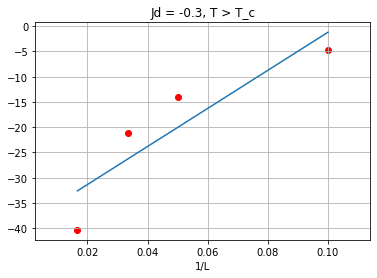

In [12]:
ls = [1/L for L in [10, 20, 30, 60]]

cs = [pf_10[0], pf_20[0], pf_30[0], pf_60[0]]

plt.scatter(ls, cs, color='red')
plt.plot(ls, np.poly1d(np.polyfit(ls, cs, 1))(ls))
plt.title('Jd = -0.3, T > T_c')
plt.xlabel('1/L')
plt.show()